# RNN-based NMT Experiments

This notebook conducts controlled experiments for RNN-based NMT models, focusing on:

1. RNN cell type (GRU vs LSTM)
2. Attention mechanism (dot / general / additive)
3. Training policy (Teacher Forcing vs Free Running)
4. Decoding strategy (Greedy vs Beam Search)

All models are trained using the same dataset and hyperparameters unless otherwise specified.


In [1]:
import subprocess
import json
import pandas as pd
from pathlib import Path

In [2]:
PROJECT_ROOT = "/root/Course/final_project"
DATA_DIR = f"{PROJECT_ROOT}/nmt_data_jieba_100k"
VOCAB_ZH = f"{DATA_DIR}/vocab_zh.json"
VOCAB_EN = f"{DATA_DIR}/vocab_en.json"
TRAIN_SCRIPT = f"{PROJECT_ROOT}/train_rnn.py"

CHECKPOINT_ROOT = f"{DATA_DIR}/checkpoints/rnn"

In [6]:
import subprocess, shlex

def run_rnn_experiment(rnn_type="lstm", attn="dot", free_running=False, train_decode="greedy", seed=42):
    cmd = [
        "python", "-u", TRAIN_SCRIPT,
        "--data_dir", DATA_DIR,
        "--vocab_zh", VOCAB_ZH,
        "--vocab_en", VOCAB_EN,
        "--epochs", "10",
        "--batch_size", "64",
        "--lr", "3e-4",
        "--emb", "256",
        "--hidden", "512",
        "--rnn_type", rnn_type,
        "--attn", attn,
        "--train_decode", train_decode,
        "--final_decode", "beam",
        "--final_beam_size", "4",
        "--seed", str(seed),
    ]
    if free_running:
        cmd.append("--free_running")

    print("Running:\n", shlex.join(cmd))

    p = subprocess.run(cmd, capture_output=True, text=True)
    print("Return code:", p.returncode)
    print("---- STDOUT ----")
    print(p.stdout)
    print("---- STDERR ----")
    print(p.stderr)

    if p.returncode != 0:
        raise RuntimeError("train_rnn.py failed, see stdout/stderr above.")


In [10]:
# LSTM baseline
run_rnn_experiment(rnn_type="lstm")

# GRU
run_rnn_experiment(rnn_type="gru")


Running:
 python -u /root/Course/final_project/train_rnn.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 64 --lr 3e-4 --emb 256 --hidden 512 --rnn_type lstm --attn dot --train_decode greedy --final_decode beam --final_beam_size 4 --seed 42
Return code: 0
---- STDOUT ----
[Epoch 1] train_loss=5.9477  valid_BLEU4=1.86
[Epoch 2] train_loss=4.9657  valid_BLEU4=2.16
[Epoch 3] train_loss=4.3846  valid_BLEU4=2.82
[Epoch 4] train_loss=3.9308  valid_BLEU4=4.00
[Epoch 5] train_loss=3.5847  valid_BLEU4=4.18
[Epoch 6] train_loss=3.3108  valid_BLEU4=5.19
[Epoch 7] train_loss=3.0839  valid_BLEU4=5.70
[Epoch 8] train_loss=2.8908  valid_BLEU4=5.78
[Epoch 9] train_loss=2.7207  valid_BLEU4=5.99
[Epoch 10] train_loss=2.5702  valid_BLEU4=5.58
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/checkpoints/rnn/nmt_dat

In [11]:
for attn in ["dot", "general", "additive"]:
    run_rnn_experiment(attn=attn)


Running:
 python -u /root/Course/final_project/train_rnn.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 64 --lr 3e-4 --emb 256 --hidden 512 --rnn_type lstm --attn dot --train_decode greedy --final_decode beam --final_beam_size 4 --seed 42
Return code: 0
---- STDOUT ----
[Epoch 1] train_loss=5.9477  valid_BLEU4=1.86
[Epoch 2] train_loss=4.9657  valid_BLEU4=2.16
[Epoch 3] train_loss=4.3846  valid_BLEU4=2.82
[Epoch 4] train_loss=3.9308  valid_BLEU4=4.00
[Epoch 5] train_loss=3.5847  valid_BLEU4=4.18
[Epoch 6] train_loss=3.3108  valid_BLEU4=5.19
[Epoch 7] train_loss=3.0839  valid_BLEU4=5.70
[Epoch 8] train_loss=2.8908  valid_BLEU4=5.78
[Epoch 9] train_loss=2.7207  valid_BLEU4=5.99
[Epoch 10] train_loss=2.5702  valid_BLEU4=5.58
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/checkpoints/rnn/nmt_dat

In [12]:
# Teacher Forcing (default)
run_rnn_experiment(free_running=False)

# Free Running
run_rnn_experiment(free_running=True)


Running:
 python -u /root/Course/final_project/train_rnn.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 64 --lr 3e-4 --emb 256 --hidden 512 --rnn_type lstm --attn dot --train_decode greedy --final_decode beam --final_beam_size 4 --seed 42
Return code: 0
---- STDOUT ----
[Epoch 1] train_loss=5.9477  valid_BLEU4=1.86
[Epoch 2] train_loss=4.9657  valid_BLEU4=2.16
[Epoch 3] train_loss=4.3846  valid_BLEU4=2.82
[Epoch 4] train_loss=3.9308  valid_BLEU4=4.00
[Epoch 5] train_loss=3.5847  valid_BLEU4=4.18
[Epoch 6] train_loss=3.3108  valid_BLEU4=5.19
[Epoch 7] train_loss=3.0839  valid_BLEU4=5.70
[Epoch 8] train_loss=2.8908  valid_BLEU4=5.78
[Epoch 9] train_loss=2.7207  valid_BLEU4=5.99
[Epoch 10] train_loss=2.5702  valid_BLEU4=5.58
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/checkpoints/rnn/nmt_dat

In [14]:
from pathlib import Path
import json
import pandas as pd

CHECKPOINT_ROOT = "/root/Course/final_project/nmt_data_jieba_100k/checkpoints/rnn"  # <- 改成你的

def load_decoding_df(root):
    rows = []
    root = Path(root)
    for run in root.iterdir():
        summary_p = run / "summary.json"
        config_p  = run / "config.json"
        if not (summary_p.exists() and config_p.exists()):
            continue
        s = json.load(open(summary_p, "r", encoding="utf-8"))
        c = json.load(open(config_p,  "r", encoding="utf-8"))

        # 只要具备 decoding 对比需要的字段就收
        if "best_valid_trainDecode_bleu4" not in s or "best_valid_beam_bleu4" not in s:
            continue

        rows.append({
            "run": run.name,
            "rnn_type": c.get("rnn_type"),
            "attn": c.get("attn"),
            "free_running": c.get("free_running"),
            "seed": c.get("seed"),

            "train_decode": s.get("train_decode"),
            "beam_size": s.get("beam_size", 4),

            "valid_greedy": s.get("best_valid_trainDecode_bleu4"),
            "test_greedy":  s.get("best_test_trainDecode_bleu4"),
            "valid_beam":   s.get("best_valid_beam_bleu4"),
            "test_beam":    s.get("best_test_beam_bleu4"),
        })

    df = pd.DataFrame(rows)
    if df.empty:
        return df

    # 计算提升
    df["valid_gain"] = df["valid_beam"] - df["valid_greedy"]
    df["test_gain"]  = df["test_beam"]  - df["test_greedy"]
    return df

df_dec = load_decoding_df(CHECKPOINT_ROOT)
df_dec


,run,rnn_type,attn,free_running,seed,train_decode,beam_size,valid_greedy,test_greedy,valid_beam,test_beam,valid_gain,test_gain
0,nmt_data_jieba_100k_rnn-lstm_attn-dot_tf_train...,lstm,dot,False,42,greedy,4,5.992982,5.174871,6.737208,5.604930,0.744226,0.430059
1,nmt_data_jieba_100k_rnn-gru_attn-dot_tf_trainD...,gru,dot,False,42,greedy,4,5.175641,5.619548,5.342515,5.531925,0.166874,-0.087623
2,nmt_data_jieba_100k_rnn-lstm_attn-general_tf_t...,lstm,general,False,42,greedy,4,6.191156,5.173290,6.749590,5.411045,0.558434,0.237755
3,nmt_data_jieba_100k_rnn-lstm_attn-additive_tf_...,lstm,additive,False,42,greedy,4,6.409979,6.181090,6.799145,6.565981,0.389166,0.384891
4,nmt_data_jieba_100k_rnn-lstm_attn-dot_fr_train...,lstm,dot,True,42,greedy,4,1.638981,1.581512,1.549835,1.749450,-0.089146,0.167938


In [15]:
# 你可以改成 lstm/gru + dot/general/additive + free_running True/False
target = df_dec[
    (df_dec["rnn_type"] == "gru") &
    (df_dec["attn"] == "dot") &
    (df_dec["free_running"] == False) &
    (df_dec["seed"] == 42)
]
target.sort_values("valid_beam", ascending=False)


,run,rnn_type,attn,free_running,seed,train_decode,beam_size,valid_greedy,test_greedy,valid_beam,test_beam,valid_gain,test_gain
1,nmt_data_jieba_100k_rnn-gru_attn-dot_tf_trainD...,gru,dot,False,42,greedy,4,5.175641,5.619548,5.342515,5.531925,0.166874,-0.087623


In [16]:
df_dec.sort_values("valid_gain", ascending=False)[
    ["run","rnn_type","attn","free_running","seed","valid_greedy","valid_beam","valid_gain","test_greedy","test_beam","test_gain"]
]


,run,rnn_type,attn,free_running,seed,valid_greedy,valid_beam,valid_gain,test_greedy,test_beam,test_gain
0,nmt_data_jieba_100k_rnn-lstm_attn-dot_tf_train...,lstm,dot,False,42,5.992982,6.737208,0.744226,5.174871,5.604930,0.430059
2,nmt_data_jieba_100k_rnn-lstm_attn-general_tf_t...,lstm,general,False,42,6.191156,6.749590,0.558434,5.173290,5.411045,0.237755
3,nmt_data_jieba_100k_rnn-lstm_attn-additive_tf_...,lstm,additive,False,42,6.409979,6.799145,0.389166,6.181090,6.565981,0.384891
1,nmt_data_jieba_100k_rnn-gru_attn-dot_tf_trainD...,gru,dot,False,42,5.175641,5.342515,0.166874,5.619548,5.531925,-0.087623
4,nmt_data_jieba_100k_rnn-lstm_attn-dot_fr_train...,lstm,dot,True,42,1.638981,1.549835,-0.089146,1.581512,1.749450,0.167938


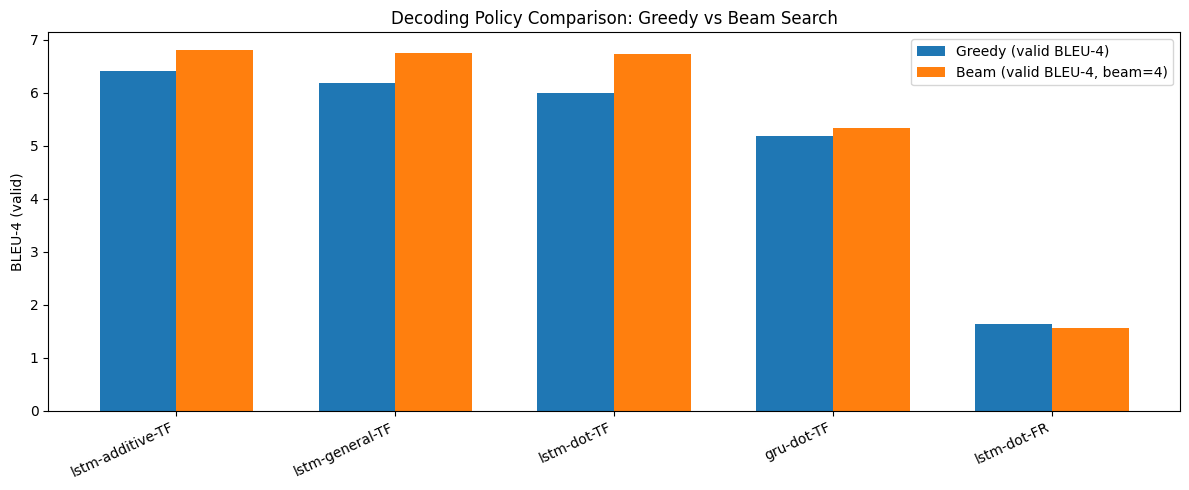

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 选你要展示的若干个 run（例如每种 attn 取一个最好的）
show = df_dec.copy()

# 你也可以只画某一类模型，比如只画 GRU
# show = show[show["rnn_type"]=="gru"]

show = show.sort_values("valid_beam", ascending=False).head(8)  # 画前8个，避免太挤

labels = [
    f'{r["rnn_type"]}-{r["attn"]}-{"FR" if r["free_running"] else "TF"}'
    for _, r in show.iterrows()
]
x = np.arange(len(labels))
w = 0.35

plt.figure(figsize=(12, 5))
plt.bar(x - w/2, show["valid_greedy"].values, width=w, label="Greedy (valid BLEU-4)")
plt.bar(x + w/2, show["valid_beam"].values, width=w, label=f"Beam (valid BLEU-4, beam={int(show['beam_size'].iloc[0])})")
plt.xticks(x, labels, rotation=25, ha="right")
plt.ylabel("BLEU-4 (valid)")
plt.title("Decoding Policy Comparison: Greedy vs Beam Search")
plt.legend()
plt.tight_layout()
plt.show()


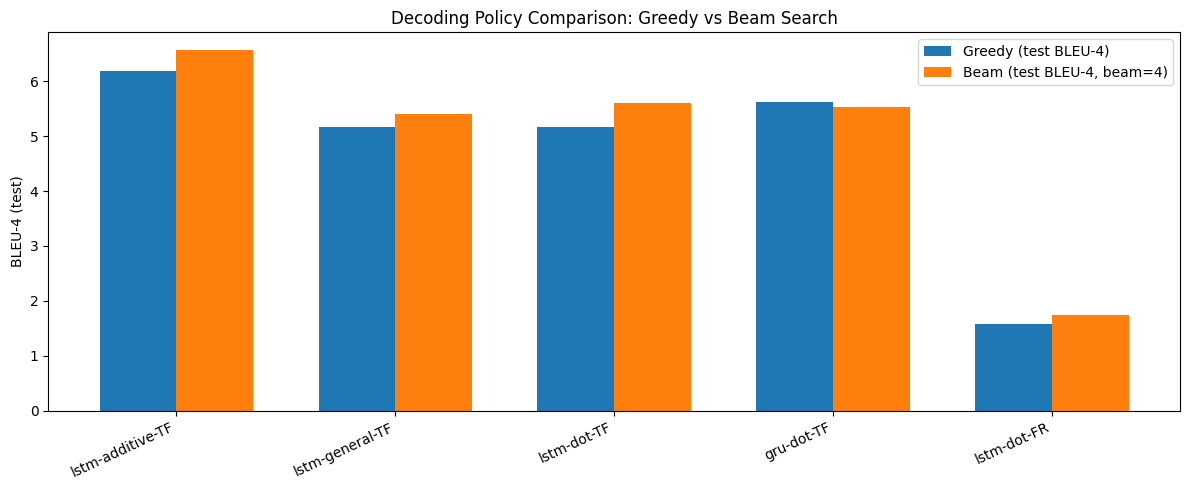

In [20]:
plt.figure(figsize=(12, 5))
plt.bar(x - w/2, show["test_greedy"].values, width=w, label="Greedy (test BLEU-4)")
plt.bar(x + w/2, show["test_beam"].values, width=w, label=f"Beam (test BLEU-4, beam={int(show['beam_size'].iloc[0])})")
plt.xticks(x, labels, rotation=25, ha="right")
plt.ylabel("BLEU-4 (test)")
plt.title("Decoding Policy Comparison: Greedy vs Beam Search")
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import json
import pandas as pd
from pathlib import Path

RNN_CKPT_ROOT = Path("/root/Course/final_project/nmt_data_jieba_100k/checkpoints/rnn")

rows = []
for run in RNN_CKPT_ROOT.iterdir():
    summary = run / "summary.json"
    config  = run / "config.json"
    if summary.exists() and config.exists():
        s = json.load(open(summary))
        c = json.load(open(config))
        rows.append({
            "run": run.name,
            "rnn_type": c["rnn_type"],
            "attn": c["attn"],
            "free_running": c["free_running"],
            "train_decode": c["train_decode"],
            "beam_size": c["beam_size"],

            # BLEU
            "valid_greedy": s.get("best_valid_trainDecode_bleu4", None),
            "test_greedy":  s.get("best_test_trainDecode_bleu4", None),
            "valid_beam":   s.get("best_valid_beam_bleu4", None),
            "test_beam":    s.get("best_test_beam_bleu4", None),
        })

df_rnn = pd.DataFrame(rows)
df_rnn


,run,rnn_type,attn,free_running,train_decode,beam_size,valid_greedy,test_greedy,valid_beam,test_beam
0,nmt_data_jieba_100k_rnn-lstm_attn-dot_tf_train...,lstm,dot,False,greedy,4,5.992982,5.174871,6.737208,5.604930
1,nmt_data_jieba_100k_rnn-gru_attn-dot_tf_trainD...,gru,dot,False,greedy,4,5.175641,5.619548,5.342515,5.531925
2,nmt_data_jieba_100k_rnn-lstm_attn-general_tf_t...,lstm,general,False,greedy,4,6.191156,5.173290,6.749590,5.411045
3,nmt_data_jieba_100k_rnn-lstm_attn-additive_tf_...,lstm,additive,False,greedy,4,6.409979,6.181090,6.799145,6.565981
4,nmt_data_jieba_100k_rnn-lstm_attn-dot_fr_train...,lstm,dot,True,greedy,4,1.638981,1.581512,1.549835,1.749450


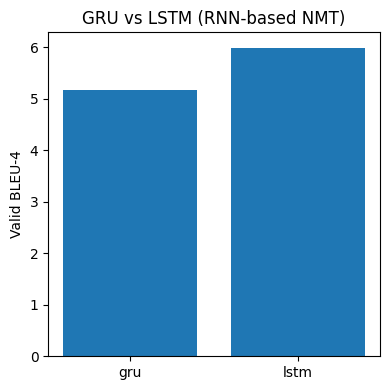

In [2]:
import matplotlib.pyplot as plt

baseline = df_rnn[
    (df_rnn["attn"] == "dot") &
    (df_rnn["free_running"] == False) &
    (df_rnn["train_decode"] == "greedy")
]

grp = baseline.groupby("rnn_type")[["valid_greedy"]].mean().reset_index()

plt.figure(figsize=(4,4))
plt.bar(grp["rnn_type"], grp["valid_greedy"])
plt.ylabel("Valid BLEU-4")
plt.title("GRU vs LSTM (RNN-based NMT)")
plt.tight_layout()
plt.show()


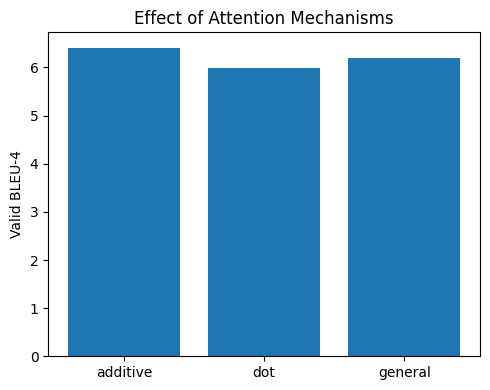

In [3]:
attn_df = df_rnn[
    (df_rnn["rnn_type"] == "lstm") &
    (df_rnn["free_running"] == False) &
    (df_rnn["train_decode"] == "greedy")
]

grp = attn_df.groupby("attn")[["valid_greedy"]].mean().reset_index()

plt.figure(figsize=(5,4))
plt.bar(grp["attn"], grp["valid_greedy"])
plt.ylabel("Valid BLEU-4")
plt.title("Effect of Attention Mechanisms")
plt.tight_layout()
plt.show()


In [6]:
from pathlib import Path
import json, pandas as pd

RNN_CKPT_ROOT = Path("/root/Course/final_project/nmt_data_jieba_100k/checkpoints/rnn")

def load_rnn_runs():
    rows = []
    for run in RNN_CKPT_ROOT.iterdir():
        if not run.is_dir(): 
            continue
        cfg = run / "config.json"
        summ = run / "summary.json"
        if not cfg.exists():
            continue
        c = json.load(open(cfg, "r", encoding="utf-8"))
        s = json.load(open(summ, "r", encoding="utf-8")) if summ.exists() else {}

        rows.append({
            "run": run.name,
            "rnn_type": c.get("rnn_type"),
            "attn": c.get("attn"),
            "free_running": bool(c.get("free_running", False)),
            # 兼容你 summary 的字段命名
            "valid_beam": s.get("best_valid_beam_bleu4", None),
            "valid_trainDec": s.get("best_valid_trainDecode_bleu4", None),
            "test_beam": s.get("best_test_beam_bleu4", None),
            "test_trainDec": s.get("best_test_trainDecode_bleu4", None),
        })
    return pd.DataFrame(rows)

df_rnn = load_rnn_runs()
df_rnn[["rnn_type","attn","free_running"]].value_counts().sort_index()


rnn_type  attn      free_running
gru       dot       False           1
lstm      additive  False           1
          dot       False           1
                    True            1
          general   False           1
Name: count, dtype: int64

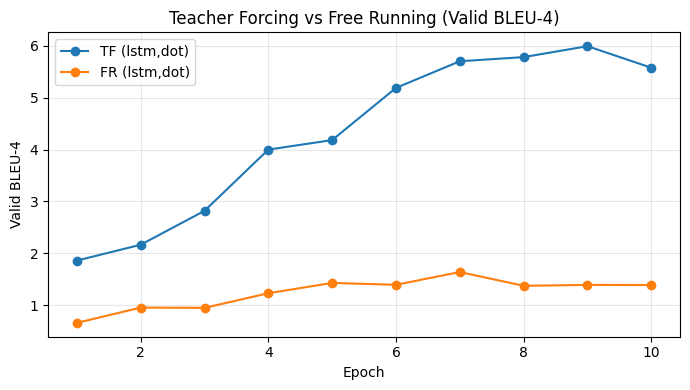

In [11]:
import matplotlib.pyplot as plt

# 你现在已有的两个 run（示例：lstm+dot 的 TF/FR）
tf_run = "nmt_data_jieba_100k_rnn-lstm_attn-dot_tf_trainDec-greedy_bs64_lr0.0003_emb256_h512_seed42"
fr_run = "nmt_data_jieba_100k_rnn-lstm_attn-dot_fr_trainDec-greedy_bs64_lr0.0003_emb256_h512_seed42"

log_tf = load_log(tf_run)
log_fr = load_log(fr_run)

plt.figure(figsize=(7,4))
plt.plot(log_tf["epoch"], log_tf["valid_bleu4"], marker="o", label="TF (lstm,dot)")
plt.plot(log_fr["epoch"], log_fr["valid_bleu4"], marker="o", label="FR (lstm,dot)")
plt.xlabel("Epoch")
plt.ylabel("Valid BLEU-4")
plt.title("Teacher Forcing vs Free Running (Valid BLEU-4)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


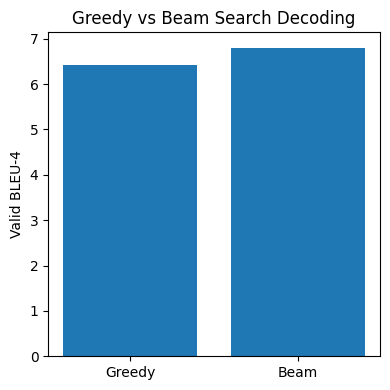

In [5]:
dec_df = df_rnn[
    (df_rnn["rnn_type"] == "lstm") &
    (df_rnn["attn"] == "additive") &
    (df_rnn["free_running"] == False)
]

labels = ["Greedy", "Beam"]
values = [
    dec_df["valid_greedy"].mean(),
    dec_df["valid_beam"].mean()
]

plt.figure(figsize=(4,4))
plt.bar(labels, values)
plt.ylabel("Valid BLEU-4")
plt.title("Greedy vs Beam Search Decoding")
plt.tight_layout()
plt.show()
